<a href="https://colab.research.google.com/github/JLAlferos/CPE-313/blob/main/Hands_on_Activity_1_3_Regularization_ALFEROS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 1.3 : Regularization

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Get the size of the sample train data

In [3]:
x_train[0].shape

(28, 28)

Check the sample train data

In [4]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Check the corresponding label in the training set

In [5]:

y_train[333]

8

Check the actual image

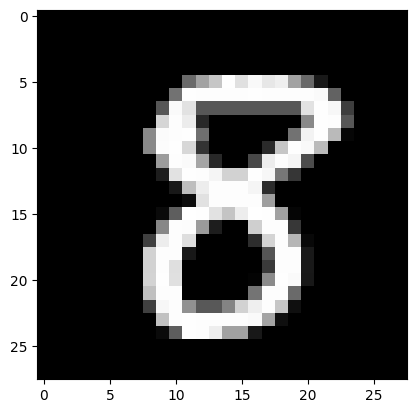

In [6]:

plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [7]:

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [8]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [9]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [10]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [12]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 2s 4ms/step - loss: 0.5144 - accuracy: 0.8467 - val_loss: 0.2044 - val_accuracy: 0.9400
Epoch 2/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2470 - accuracy: 0.9274 - val_loss: 0.1513 - val_accuracy: 0.9535
Epoch 3/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1977 - accuracy: 0.9417 - val_loss: 0.1280 - val_accuracy: 0.9631
Epoch 4/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1697 - accuracy: 0.9498 - val_loss: 0.1182 - val_accuracy: 0.9657
Epoch 5/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1532 - accuracy: 0.9551 - val_loss: 0.1045 - val_accuracy: 0.9686
Epoch 6/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1428 - accuracy: 0.9574 - val_loss: 0.1022 - val_accuracy: 0.9699
Epoch 7/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1324 - accuracy: 0.9610 - val_loss: 0.0981 - val_accuracy: 0.9704
Epoch 

Use Keras evaluate function to evaluate performance on the test set

In [13]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10062427073717117
Test accuracy: 0.9763000011444092


Interpret the result

> **The model achieved a test loss of 0.1006 (10.06%) and a test accuracy of 0.9763 (97.63%). This shows that the model is performing well on the test data, with a very low loss and high accuracy.**

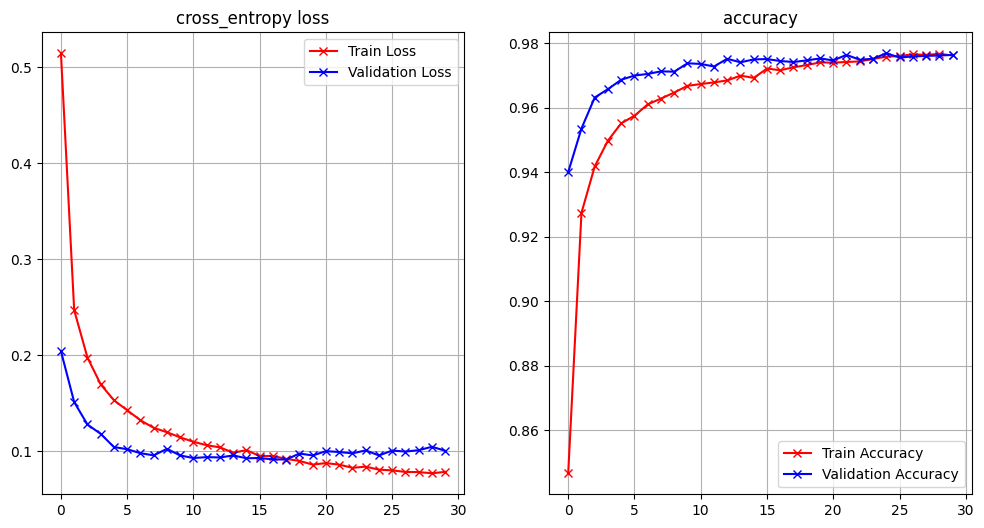

In [14]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

Interpret the result

> **The cross entropy loss graph for both training and validation loss shows that, as the training progresses the loss decreases. This means that the model is learning to make better predictions. The accuracy graph, on the other hand, shows both the training and validation accuracy increases as the training progresses. This also means that the model is learning to make better predictions.**

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

### 1. Two hidden layers.
### 2. First hidden layer of size 400 and second size 300
### 3. Dropout of .4 at each layer

In [15]:
model_1 = Sequential()
model_1.add(Dense(400, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.4))
model_1.add(Dense(300, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(10, activation='softmax'))

### 4. How many parameters does your model have? How does it compare with the previous model?

In [16]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 400)               314000    
                                                                 
 dropout_2 (Dropout)         (None, 400)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               120300    
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> The total parameter that model_1 has is 437310. Compared to the previous model, it has a significantly larger total params since we increased the size of two hidden layers, and the dropout of each layer.

### 5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

In [18]:
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 20
history_model_1 = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3319 - accuracy: 0.8981 - val_loss: 0.1293 - val_accuracy: 0.9590
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1552 - accuracy: 0.9527 - val_loss: 0.0951 - val_accuracy: 0.9707
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1211 - accuracy: 0.9639 - val_loss: 0.0859 - val_accuracy: 0.9744
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1036 - accuracy: 0.9697 - val_loss: 0.0821 - val_accuracy: 0.9747
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0890 - accuracy: 0.9729 - val_loss: 0.0721 - val_accuracy: 0.9793
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0839 - accuracy: 0.9749 - val_loss: 0.0729 - val_accuracy: 0.9795
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0740 - accuracy: 0.9771 - val_loss: 0.0736 - val_accuracy: 0.9792
Epoch 

In [19]:
score_1 = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])

Test loss: 0.0796860009431839
Test accuracy: 0.9848999977111816


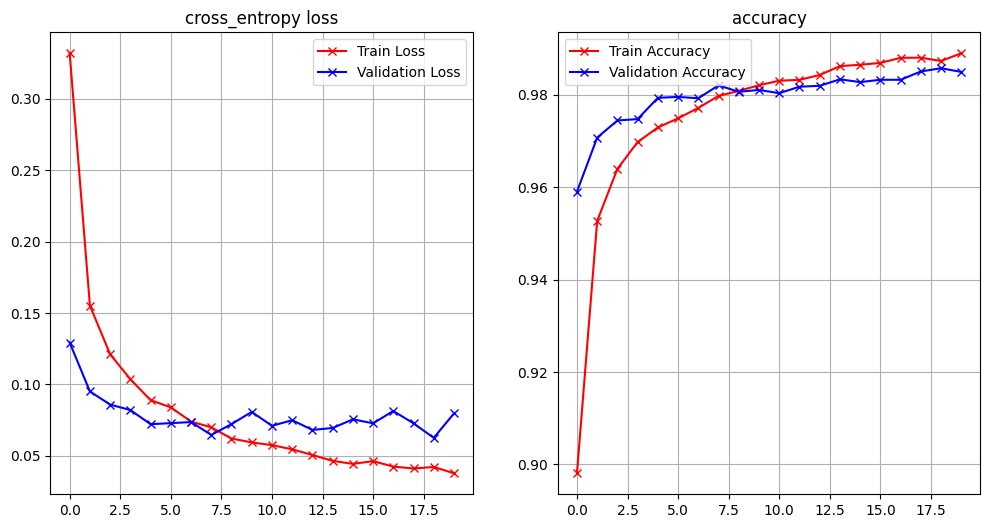

In [20]:
plot_loss_accuracy(history_model_1)

### 6. Use at least two regularization techniques and apply it to the new model (model_2)

In [21]:
from keras.regularizers import l2
from keras.optimizers import Adam

In [22]:

model_2 = Sequential()
model_2.add(Dense(400, activation='relu', input_shape=(784,), kernel_regularizer=l2(0.001)))
model_2.add(Dropout(0.4))
model_2.add(Dense(300, activation='relu', kernel_regularizer=l2(0.001)))
model_2.add(Dropout(0.4))
model_2.add(Dense(10, activation='softmax'))

### 7. Train this model for your preferred epochs , learning rate, batch size and optimizer

In [34]:
learning_rate = .0001
model_2.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 200
epochs = 40

history_model_2 = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/40
300/300 [==============================] - 4s 11ms/step - loss: 0.2036 - accuracy: 0.9660 - val_loss: 0.1738 - val_accuracy: 0.9763
Epoch 2/40
300/300 [==============================] - 3s 10ms/step - loss: 0.2030 - accuracy: 0.9671 - val_loss: 0.1749 - val_accuracy: 0.9763
Epoch 3/40
300/300 [==============================] - 3s 10ms/step - loss: 0.2060 - accuracy: 0.9672 - val_loss: 0.1759 - val_accuracy: 0.9775
Epoch 4/40
300/300 [==============================] - 3s 9ms/step - loss: 0.2026 - accuracy: 0.9689 - val_loss: 0.1805 - val_accuracy: 0.9749
Epoch 5/40
300/300 [==============================] - 3s 11ms/step - loss: 0.2014 - accuracy: 0.9696 - val_loss: 0.1768 - val_accuracy: 0.9774
Epoch 6/40
300/300 [==============================] - 3s 10ms/step - loss: 0.2023 - accuracy: 0.9685 - val_loss: 0.1718 - val_accuracy: 0.9787
Epoch 7/40
300/300 [==============================] - 3s 9ms/step - loss: 0.2069 - accuracy: 0.9674 - val_loss: 0.1765 - val_accuracy: 0.9777
E

### 8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [35]:
score_2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Test loss: 0.18720924854278564
Test accuracy: 0.9754999876022339


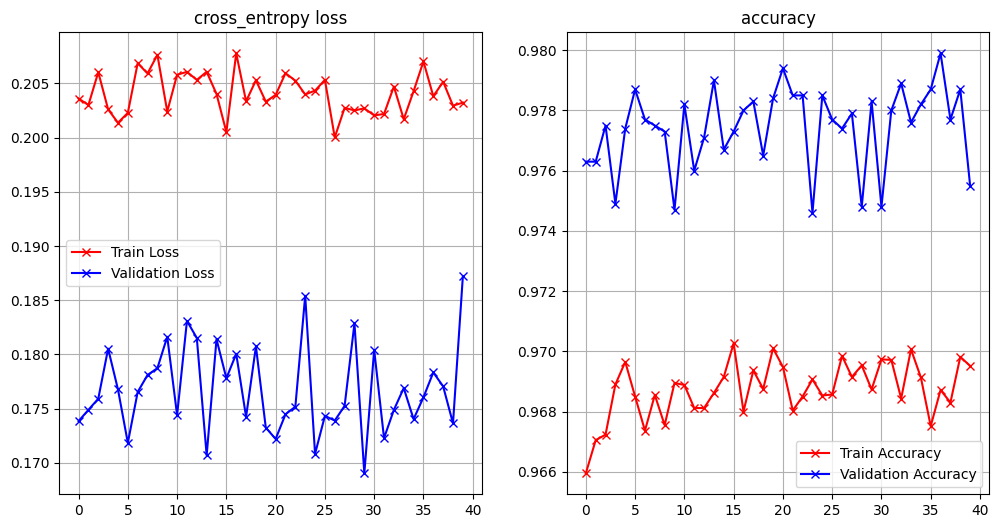

In [36]:
plot_loss_accuracy(history_model_2)

In [37]:
score_1 = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])

Test loss: 0.0796860009431839
Test accuracy: 0.9848999977111816


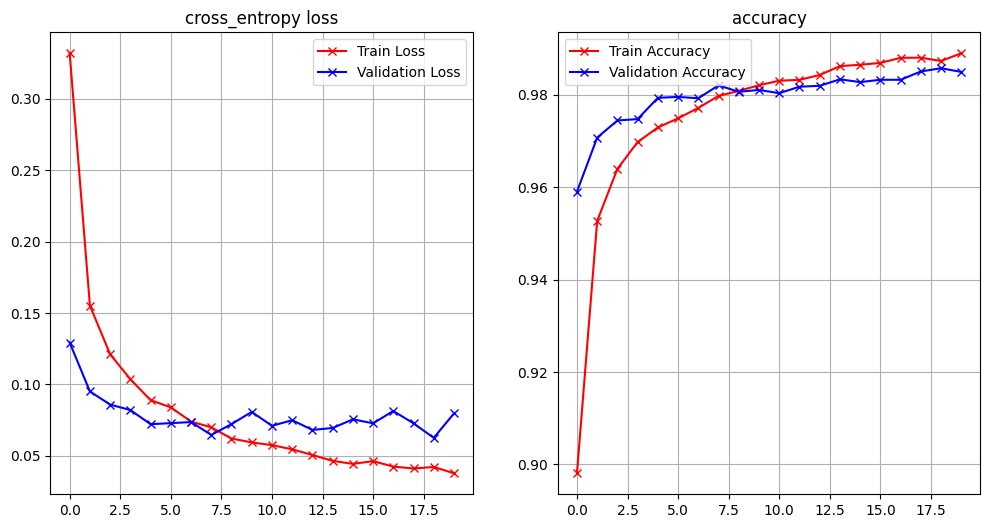

In [38]:
plot_loss_accuracy(history_model_1)

> Comparing the two models, model_1 and model_2, it is clear that model_1 has a better prediction. Model_1 has a smoother entrophy loss going downward, stating that it is improving as it proceeds in training, compared to model_2, which has a jagged random graph that indicates that the training is trash. The accuracy of the two also has a significant different with model_1 still having a better accuray graph than the model_2's jagged graph. Overall, model_1 has a better ability to predict than the model_2.

### Conclusion

> In this activity, we build and train neural networks with regularization, visualize the model with regularization, and evaluate the result of the model. It is hard to get an optimal model as it requires extensive manipulation of the training parameters of the layers of a neural network. The most challenging part of this activity is to produce a high accuracy model with low loss, and it is clear in my output on the supplementary activity that one of my model has a trash training resulting to a trash output. Overall, this activity helped us to understan the building and training of neural networks with regularization.

https://colab.research.google.com/drive/1W7aKXH-5D9ud8NhMxdvV3e7fx-d11utc?usp=sharing